In [1]:
# 인식된 사진에 정보 표시하기

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    # JPG 등의 이미지 파일을 다룰 수 있는 모듈
import requests
import json

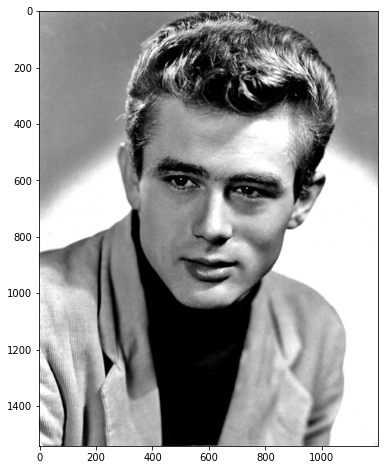

In [5]:
img = mpimg.imread('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [10]:
# 얼굴 감지 API 를 이용한 결과에 표시하자

client_id = 'z_wzqr407Cxx_3A_6TjA'
client_secret = 'cqZ20xcmGW'

url = 'https://openapi.naver.com/v1/vision/face'
files = {'image':open('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret}

print('response--'*5)
response = requests.post(url, files=files, headers=headers)
print(type(response),'/n결과: ',response)

print('detect_result--'*5)
detect_result = json.loads(response.text)
print(type(detect_result))

response--response--response--response--response--
<class 'requests.models.Response'> 
결과:  <Response [200]>
detect_result--detect_result--detect_result--detect_result--detect_result--
<class 'dict'>


In [17]:
# detect_result 는 dict 형태

# 어떤 key를 갖고 있을까 
print(detect_result.keys())
# dict_keys(['info', 'faces'])

# faces의 정보를 확인
print(detect_result['faces'])

dict_keys(['info', 'faces'])
[{'roi': {'x': 368, 'y': 488, 'width': 539, 'height': 539}, 'landmark': {'leftEye': {'x': 499, 'y': 590}, 'rightEye': {'x': 752, 'y': 630}, 'nose': {'x': 603, 'y': 777}, 'leftMouth': {'x': 494, 'y': 874}, 'rightMouth': {'x': 713, 'y': 898}}, 'gender': {'value': 'male', 'confidence': 0.999998}, 'age': {'value': '25~29', 'confidence': 0.122281}, 'emotion': {'value': 'neutral', 'confidence': 0.999996}, 'pose': {'value': 'frontal_face', 'confidence': 0.995972}}]


In [21]:
print(detect_result['faces'][0])
print('-'*50)
print(detect_result['faces'][0]['roi']) # 검출된 얼굴이 존재하는 x,y의 좌표와 너비, 높이 정보
print('-'*50)
print(detect_result['faces'][0]['gender'])
print('-'*50)
print(detect_result['faces'][0]['age'])
print('-'*50)
print(detect_result['faces'][0]['emotion'])

# 이 정보들을 한 번에 받을 수 있도록 아래에서 정리하자

{'roi': {'x': 368, 'y': 488, 'width': 539, 'height': 539}, 'landmark': {'leftEye': {'x': 499, 'y': 590}, 'rightEye': {'x': 752, 'y': 630}, 'nose': {'x': 603, 'y': 777}, 'leftMouth': {'x': 494, 'y': 874}, 'rightMouth': {'x': 713, 'y': 898}}, 'gender': {'value': 'male', 'confidence': 0.999998}, 'age': {'value': '25~29', 'confidence': 0.122281}, 'emotion': {'value': 'neutral', 'confidence': 0.999996}, 'pose': {'value': 'frontal_face', 'confidence': 0.995972}}
--------------------------------------------------
{'x': 368, 'y': 488, 'width': 539, 'height': 539}
--------------------------------------------------
{'value': 'male', 'confidence': 0.999998}
--------------------------------------------------
{'value': '25~29', 'confidence': 0.122281}
--------------------------------------------------
{'value': 'neutral', 'confidence': 0.999996}


In [24]:
# {'x': 368, 'y': 488, 'width': 539, 'height': 539}
x,y,w,h = detect_result['faces'][0]['roi'].values()

# {'value': 'male', 'confidence': 0.999998}
gender, gen_confidence = detect_result['faces'][0]['gender'].values()

# {'value': '25~29', 'confidence': 0.122281}
age, age_confidence = detect_result['faces'][0]['age'].values()

# {'value': 'neutral', 'confidence': 0.999996}
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()

In [26]:
annotaion = gender + ':' + str(gen_confidence) + /
            '/n' + emotion + ':' + str(emo_confidence) + /
            '/n' + age + ':' + str(age_confidence)
            
print(annotaion)

male:0.999998
neutral:0.999996
25~29:0.122281


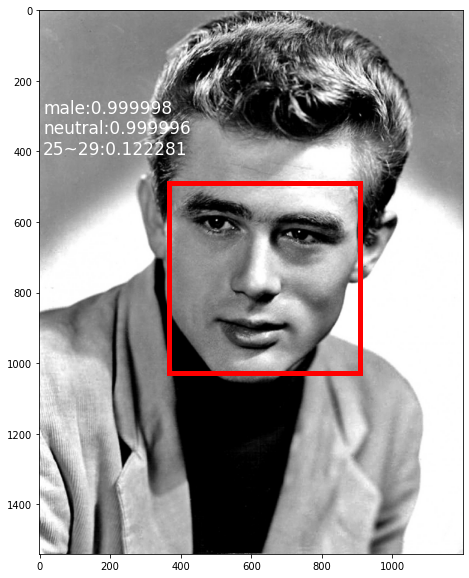

In [36]:
import matplotlib.patches as patches # jpg 등의 사진에 추가로 박스나 원 등의 도형을 그릴 수 있는 모듈

img = mpimg.imread('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y), w, h,      # 위치, 크기 설정
                              linewidth=5,      # 선 두께
                              edgecolor='r',    # 선 색상
                              facecolor='none') # 채우기 색

ax.add_patch(rect_face) # 위에서 설정한 patch를 더하기

plt.text(x=10
         , y=400                # 위치 설정
         , s=annotaion          # 작성할 text
         , wrap=True            # 자동 줄바꾸기
         , fontsize=17
         , color = 'white')
plt.show()